In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import uncertainties as unc
import pandas as pd
import uncertainties.unumpy as unp
from matplotlib import cm
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
from lmfit.models import ExponentialModel, GaussianModel

data1nm = pd.read_csv('data1nm.csv')
data2nm = pd.read_csv('data2nm.csv')
data5nm = pd.read_csv('data5nm.csv')
data10nm = pd.read_csv('data10nm.csv')
data15nm = pd.read_csv('data15nm.csv')
data20nm = pd.read_csv('data20nm.csv')
data25nm = pd.read_csv('data25nm.csv')
data30nm = pd.read_csv('data30nm.csv')
data50nm = pd.read_csv('data50nm.csv')

In [6]:
def plot3dVacancy(depth,data,thickness,lab):
    model1 = GaussianModel() 
    model = model1
    params = model.make_params()

    params['amplitude'].set(value = 2e8, vary=True)
    params['center'].set(value = 0, vary=True)
    params['sigma'].set(value = 7.5, vary=True)
    model_fit = model.fit(data, params, x=depth)
    fit_x = np.linspace(0,30,1000)
    fitcurve = model_fit.eval(model_fit.params, x = fit_x)
    if lab == 0:
        # ax.scatter(depth, data, zs=thickness, zdir='y', marker = '^',  color = 'k', s = 5, )
        ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', linestyle = '--', lw = 1.3)
    else:
        # ax.scatter(depth, data, zs=thickness, zdir='y', marker = '.', label = 'Carbon Vacancy Distribution Data', color = 'k', s = 1)
        ax.plot(fit_x, fitcurve, zs=thickness, zdir='y', linestyle = '--', label = 'Carbon Vacancy Distribution', lw = 1.3)
    
    obj = ax.fill_between(fit_x, 0, fitcurve, step='mid', alpha=0.1) 
    ax.add_collection3d(obj, zs = thickness, zdir = 'y')

In [7]:
def plot3dSilicon(depth,data,thickness,lab):
    if lab == 0:
        ax.plot(depth, data, zs=thickness, zdir='y', lw = 2, color = 'aqua')
    else:
        ax.plot(depth, data, zs=thickness, zdir='y', lw = 2, color = 'aqua', label = 'Silicon Atom Distribution')

No handles with labels found to put in legend.


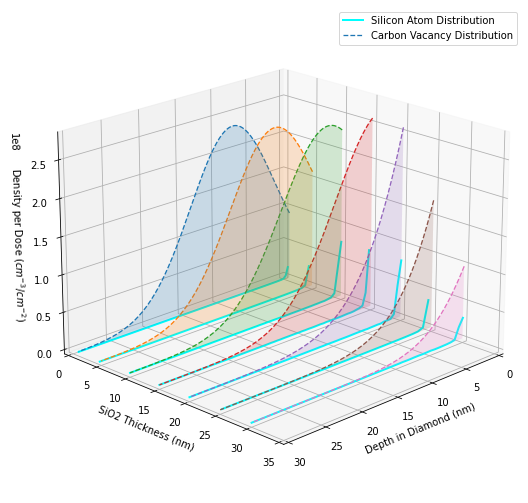

In [8]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
plt.grid()

ax.legend()
ax.set_xlim(0, 30)
ax.set_ylim(0, 35)
ax.set_zlim(0, 2.8e8)
ax.set_xlabel('Depth in Diamond (nm)')
ax.set_ylabel('SiO2 Thickness (nm)')
ax.set_zlabel('Density per Dose ($cm^{-3}$/$cm^{-2}$)')

plot3dSilicon(data1nm['Depth'],data1nm['Si'], 1,1)
plot3dSilicon(data5nm['Depth'],data5nm['Si'], 5,0)
plot3dSilicon(data10nm['Depth'],data10nm['Si'],10,0)
plot3dSilicon(data15nm['Depth'],data15nm['Si'], 15,0)
plot3dSilicon(data20nm['Depth'],data20nm['Si'], 20,0)
plot3dSilicon(data25nm['Depth'],data25nm['Si'], 25,0)
plot3dSilicon(data30nm['Depth'],data30nm['Si'], 30,0)


plot3dVacancy(data1nm['Depth'],data1nm['C']*1e8, 1,1)
plot3dVacancy(data5nm['Depth'],data5nm['C']*1e8, 5,0)
plot3dVacancy(data10nm['Depth'][1:],data10nm['C'][1:]*1e8,10,0)
plot3dVacancy(data15nm['Depth'][1:],data15nm['C'][1:]*1e8, 15,0)
plot3dVacancy(data20nm['Depth'][1:],data20nm['C'][1:]*1e8, 20,0)
plot3dVacancy(data25nm['Depth'][1:],data25nm['C'][1:]*1e8, 25,0)
plot3dVacancy(data30nm['Depth'][1:],data30nm['C'][1:]*1e8, 30,0)


ax.view_init(elev=20., azim=45)

ax.legend()